## Analysis of the MetOcean Stokes drift data from the Wadden Sea

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
import urllib.request

data = json.loads(urllib.request.urlopen('https://plasticadrift.science.uu.nl/galapagosdrifters/waddendrifters_detailed.json').read().decode('utf-8'))

Analysis of time between records for each drifter (set at 30 minutes for the first test; 5 minutes for the second test)

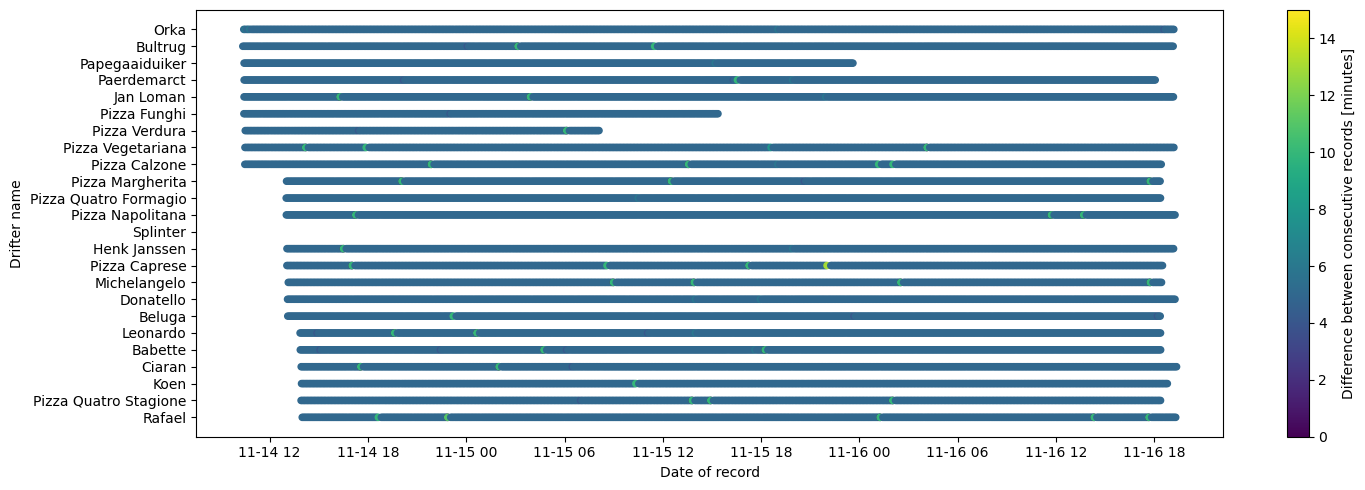

In [2]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
for i, drifter in enumerate(data.keys()):
    times = np.array([pd.to_datetime(d[0]) for d in data[drifter]], dtype='datetime64[s]')
    dt = np.diff(times)
    sc = ax.scatter(times[:-1], (len(times)*[i])[:-1], s=20, c=dt/60, vmin=0, vmax=15, cmap='viridis')
ax.set_yticklabels([])
plt.colorbar(sc, ax=ax, label="Difference between consecutive records [minutes]")
ax.set_yticks(range(len(data.keys())), data.keys())
ax.set_ylabel('Drifter name')
ax.set_xlabel('Date of record')
ax.invert_yaxis()
plt.tight_layout()
plt.show()

Analysis of the speed of the drifters as a function of time

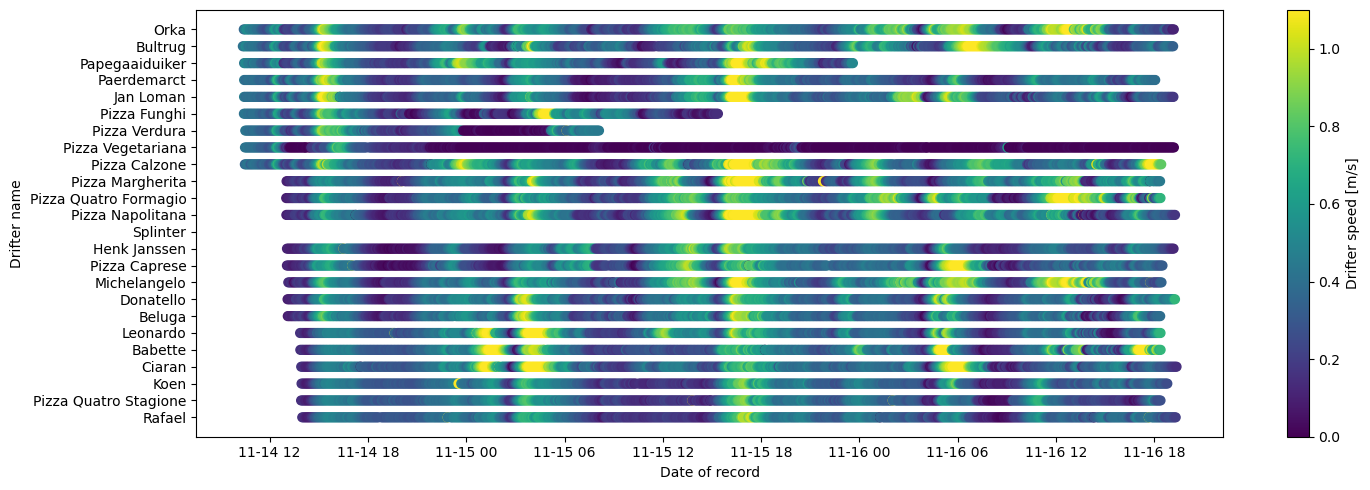

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
for i, drifter in enumerate(data.keys()):
    times = np.array([pd.to_datetime(d[0]) for d in data[drifter]], dtype='datetime64[s]')
    lats = [d[1] for d in data[drifter]]
    lons = [d[2] for d in data[drifter]]
    if len(lons) > 0:
        dt = np.diff(times)
        dx = np.diff(lons)*1852*60*np.cos(np.mean(lats)*np.pi/180)
        dy = np.diff(lats)*1852*60
        u = dx/(dt.astype(float))
        v = dy/(dt.astype(float))
        sc = ax.scatter(times[:-1], (len(times)*[i])[:-1], s=40, vmin=0, vmax=1.1, c=np.hypot(u, v), cmap='viridis')
ax.set_yticklabels([])
plt.colorbar(sc, ax=ax, label="Drifter speed [m/s]")
ax.set_yticks(range(len(data.keys())), data.keys())
ax.set_ylabel('Drifter name')
ax.set_xlabel('Date of record')
ax.invert_yaxis()
plt.tight_layout()
plt.show()

Analysis of the speed of the drifters as a function of location

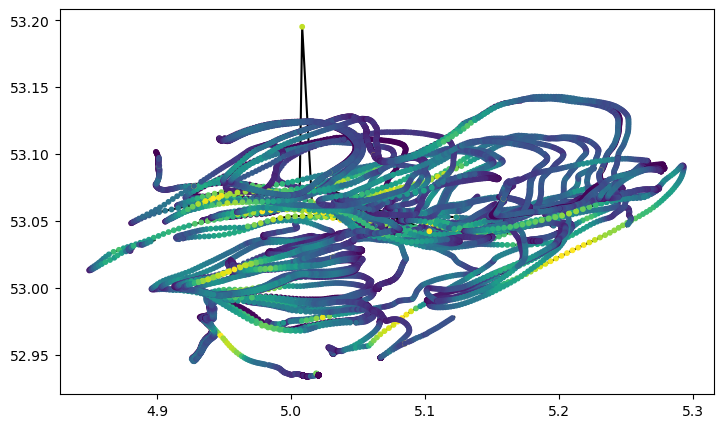

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
for i, drifter in enumerate(data.keys()):
    times = np.array([pd.to_datetime(d[0]) for d in data[drifter]], dtype='datetime64[s]')
    lats = [d[1] for d in data[drifter]]
    lons = [d[2] for d in data[drifter]]
    if len(lons) > 0:
        dt = np.diff(times)
        dx = np.diff(lons)*1852*60*np.cos(np.mean(lats)*np.pi/180)
        dy = np.diff(lats)*1852*60
        u = dx/(dt.astype(float))
        v = dy/(dt.astype(float))

        ax.plot(lons, lats, 'k-')
        sc = ax.scatter(lons[:-1], lats[:-1], s=10, c=np.hypot(u, v), label=drifter, zorder=10)

ax.set_aspect('equal')
plt.show()

Analysis of the orientation of the drifters (up or down)

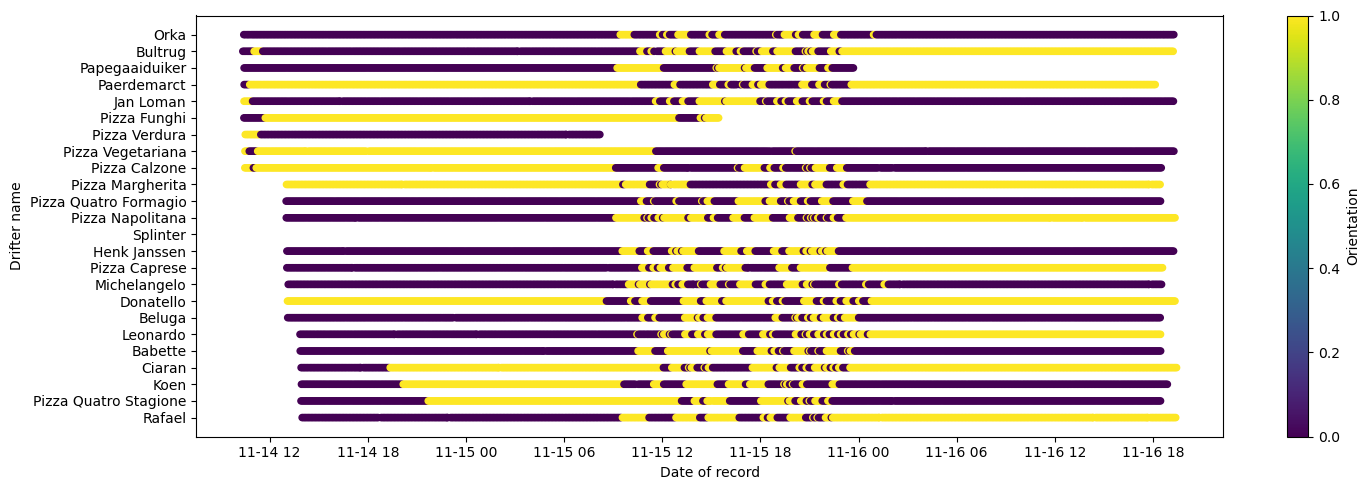

In [5]:
fig, ax = plt.subplots(figsize=(15, 5))
for i, drifter in enumerate(data.keys()):
    times = np.array([pd.to_datetime(d[0]) for d in data[drifter]], dtype='datetime64[s]')
    orientation = [d[3] for d in data[drifter]]
    plt.scatter(times, (len(orientation)*[i]), vmin=0, vmax=1, s=20, c=orientation, cmap='viridis')
plt.colorbar(label="Orientation")
plt.yticks(range(len(data.keys())), data.keys())
plt.ylabel('Drifter name')
ax.set_xlabel('Date of record')
ax.invert_yaxis()
plt.tight_layout()
plt.show()

Analysis of battery voltage

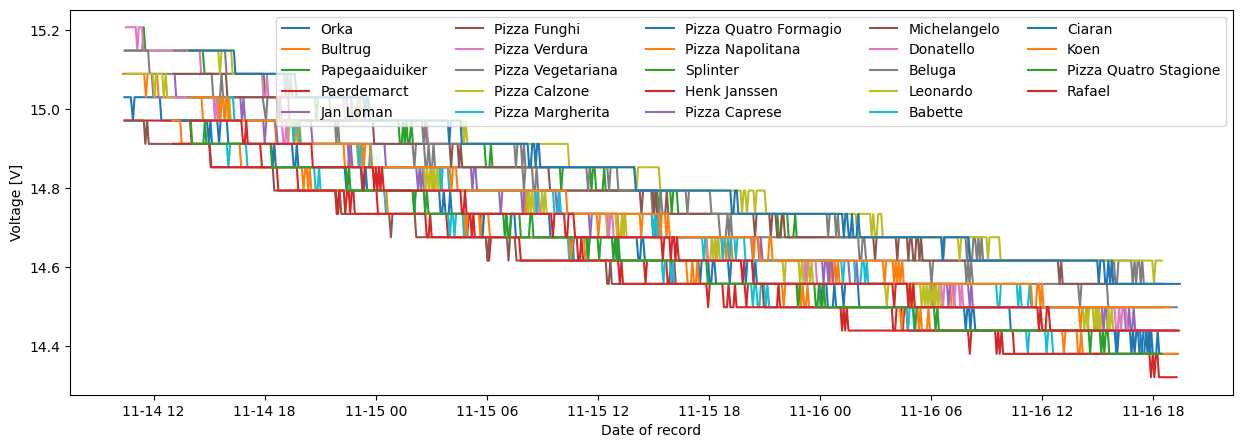

In [6]:
fig, ax = plt.subplots(figsize=(15, 5))
for i, drifter in enumerate(data.keys()):
    times = np.array([pd.to_datetime(d[0]) for d in data[drifter]], dtype='datetime64[m]')
    voltage = [d[4] for d in data[drifter]]
    ax.plot(times, voltage, label=drifter)
plt.legend(ncol=5)
plt.xlabel('Date of record')
plt.ylabel('Voltage [V]')
plt.show()

Analysis of the sea surface temperature at the location of the drifters

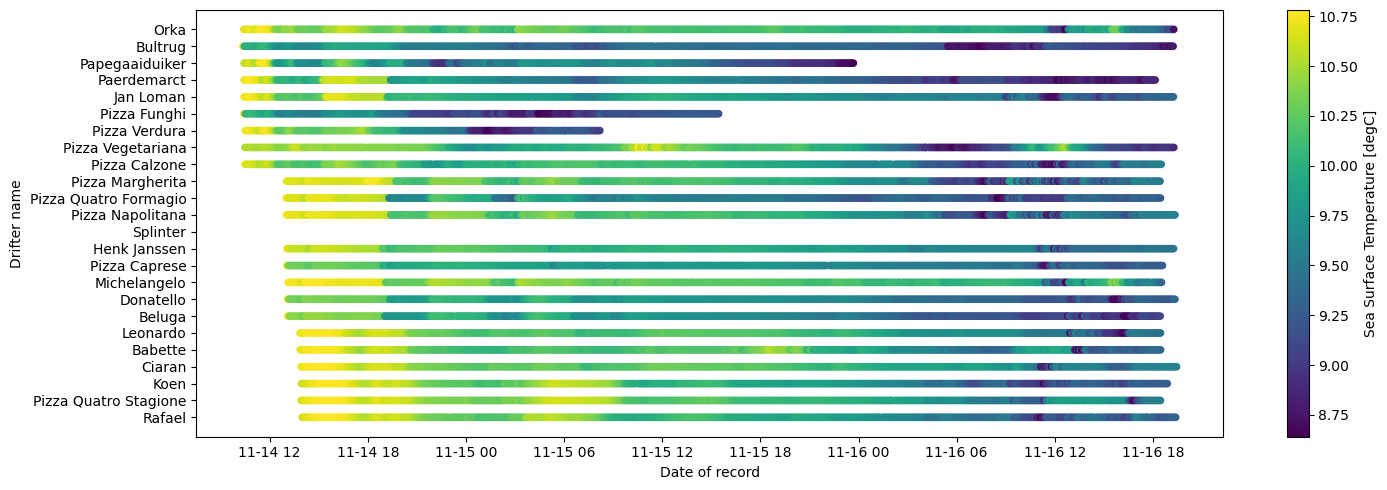

In [7]:
fig, ax = plt.subplots(figsize=(15, 5))
for i, drifter in enumerate(data.keys()):
    times = np.array([pd.to_datetime(d[0]) for d in data[drifter]], dtype='datetime64[s]')
    SST = [d[8] for d in data[drifter]]
    plt.scatter(times, (len(SST)*[i]), s=20, c=SST, cmap='viridis')
plt.colorbar(label="Sea Surface Temperature [degC]")
plt.yticks(range(len(data.keys())), data.keys())
plt.ylabel('Drifter name')
ax.set_xlabel('Date of record')
ax.invert_yaxis()
plt.tight_layout()
plt.show()
